<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/Day01_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1. 기초통계량 계산
**📘 문제**
- 온라인 쇼핑몰 고객 1,000명을 대상으로 1점부터 10점 사이의 만족도 조사를 실시했습니다.
이 데이터를 바탕으로 고객 만족도의 **중심 경향성**과 **분포 특성**을 파악해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

  - 평균, 중앙값, 최빈값, 표준편차를 계산해 봅시다.
  - 히스토그램을 그리고 평균과 중앙값 선으로 표시해 봅시다.
  - 데이터의 분포 형태를 해석한 후, 마케팅 전략 수립에 어떻게 활용할 수 있을지 생각해 봅시다.

In [24]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [25]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [26]:
# 데이터 생성

np.random.seed(2025)
# 난수 생성기의 시드를 2025로 고정
# 매번 동일한 랜덤값이 생성되도록 만드는 설정
# 재현성(reproducibility)이 필요할 때 자주 사용

satisfaction = np.random.normal(7.5, 1.5, 1000)
# 정규분포 기반 랜덤값 생성
# 평균(loc) = 7.5
# 표준편차(scale) = 1.5
# 샘플 개수(size) = 1000

satisfaction = np.clip(satisfaction, 1, 10)
# 값 제한(클리핑)
# 최소값 1, 최대값 10

df1 = pd.DataFrame({'score': satisfaction})
# satisfaction 배열을 score라는 이름의 컬럼으로 가지는 pandas dataframe을 만듦

In [27]:
mean_value = df1['score'].mean()
median_value = df1['score'].median()
mode_value = df1['score'].mode()[0]
std_value = df1['score'].std()

mean_value, median_value, mode_value, std_value

(np.float64(7.428689549278887),
 7.421730663868805,
 np.float64(10.0),
 1.3926708008249713)

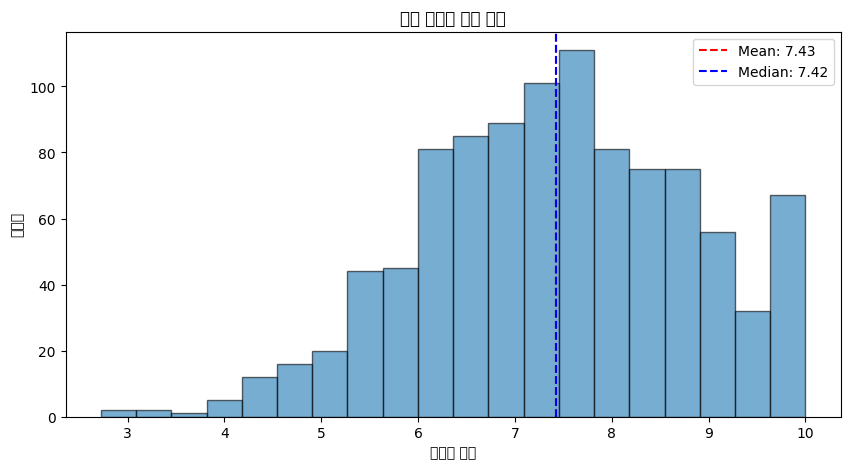

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df1['score'], bins=20, alpha=0.6, edgecolor='black')

plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')

plt.title("고객 만족도 점수 분포")
plt.xlabel("만족도 점수")
plt.ylabel("빈도수")
plt.legend()
plt.show()


**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?
    - 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요? (예: 대칭형, 정규분포 등)
    - 두 값의 차이가 크다면, 그 이유는 무엇일까요?
    - 어떤 값들이 평균을 끌어내리거나 끌어올렸을까요?

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?
    - 반대로 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요? 이럴 때 분포가 어떻게 달라질 수 있을까요?

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?

1. 평균과 중앙값의 차이가 0.01로 매우 작다.    
대칭적인 정규분포 형태일 가능성이 높다. (데이터가 한쪽으로 치우치지 않았을 가능성이 높다)    
- 두 값의 차이가 크다면 극단값이 존재하거나 한쪽으로 치우친 분포 형태를 띠는 것일 수 있다
- 최빈값이 평균보다 낮은 경우에는 왼쪽 꼬리가 길어져서 평균이 낮아진다    
2. 전반적인 만족도가 낮지 않음 - 7.4라는 평균    
높은 만족도를 준 고객에게는 리뷰를 요청할 수 있고 낮은 점수를 준 고객 대상으로는 불만의 사유를 파악하는 설문이 추가 제공되도록 할 수 있다    
3. 최빈값이 10이라 만족도가 높은 고객군이 존재한다고 볼 수 있음    


# 문제 2. 평균 vs 중앙값 비교
**📘 문제**
- A지역과 B지역의 연봉 데이터를 비교해 봅시다.
- B 지역에는 일부 고소득자가 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
- 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
- 지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각적으로 확인해 봅시다.

In [29]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역: 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),    # 일반 소득자 95명
    np.random.normal(1500, 200, 5)    # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

In [30]:
mean_a = df2[df2['region'] == 'A']['salary'].mean()
median_a = df2[df2['region'] == 'A']['salary'].median()

mean_b = df2[df2['region'] == 'B']['salary'].mean()
median_b = df2[df2['region'] == 'B']['salary'].median()

mean_a, median_a, mean_b, median_b

(np.float64(292.5066374901889),
 294.32448331703154,
 np.float64(347.5949090667186),
 287.34748777411573)

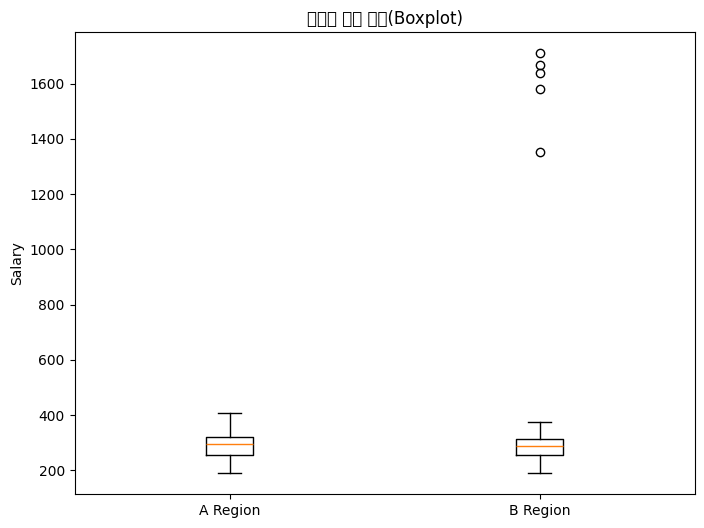

In [31]:
plt.figure(figsize=(8, 6))
plt.boxplot([df2[df2['region']=='A']['salary'],
             df2[df2['region']=='B']['salary']],
            labels=['A Region', 'B Region'],
            showfliers=True)

plt.title("지역별 연봉 분포(Boxplot)")
plt.ylabel("Salary")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**
1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?
    - 두 지역의 평균 차이가 의미하는 바는 무엇인가요?
    - 고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?

2. 중앙값은 어떠한가요?
    - 평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?
    - 평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?
    - 이상치(Outlier)는 어떻게 표시되나요?
    - 두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?
    - 어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?




1. A지역의 평균은 292.51이고 중앙값은 294.32, B 지역의 평균은 357.59이고 중앙값은 287.35이다. A 지역은 평균과 중앙값이 비슷하지만 B지역은 고소득자(극단값) 때문에 평균이 크게 상승되었다. 박스플롯에서도 B지역은 이상치게 위쪽에 다수 존재하는 것으로 표현되었다.
2. 중앙값은 오히려 A 지역이 더 높다. 왜냐하면 중앙값은 극단값의 영향을 평균값보다 훨씬 적게 받기 때문이다.
3. 극단값(고소득자)의 영향은 평균(mean)에서 더 크게 나타난다.
4. 박스플롯에서 B지역에서 위에 있는 고소득자 이상치들이 있다. 원형 점들 말이다. 두 지역의 일반 소득자 분포는 비슷하다. A지역은 IQR이 좁다. 고르게 분포되어있다. B 지역은 상단에 이상치들이 존재한다.
5. 평균만 보고 판단했을 때 B 지역이 연봉이 더 높다고 착각할 수 있다. 하지만 대부분의 B지역 근로자는 평균보다 낮은 연봉을 받으며, 단지 고소득자 몇 명 때문에 평균이 올라간 것 뿐이다.

# 문제 3. 이상값과 분산 비교
**📘 문제**
- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [32]:
# 데이터 생성
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

In [33]:
stats = df3.groupby('class')['score'].agg(['mean', 'std', 'min', 'max'])
stats

,mean,std,min,max
class,,,,
1반,75.724316,7.062710,60.685416,92.175893
2반,73.728848,22.340818,0.000000,130.000000


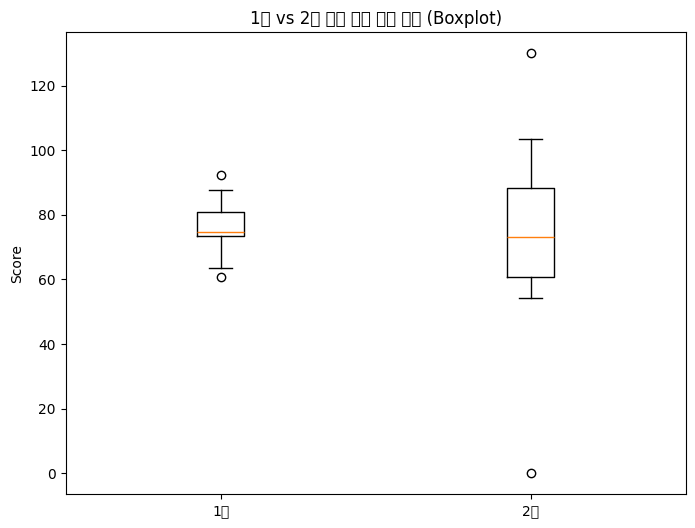

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot([
    df3[df3['class'] == '1반']['score'],
    df3[df3['class'] == '2반']['score']
], labels=['1반', '2반'], showfliers=True)

plt.title("1반 vs 2반 시험 점수 분포 비교 (Boxplot)")
plt.ylabel("Score")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?
    - 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?
    - 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?
    - 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?
    - 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?
    - 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?
    - 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?
    - 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?
    - 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?

1. 표준편차를 보면 2반이 훨씬 크다. 2반에는 0점, 130점이라는 극단적인 값들이 포함되어 있기 때문에 전체 점수들이 평균에서 멀리 떨어진 것처럼 보이기 때문이다. 이상값이 포함되면 표준편차는 더 커지고 범위는 더 넓어진다.
2. 이상값이 있는 반의 평균에는 130점과 0점이 평균을 올리고 내리는 것에 각각 관여했겠지만 0점의 영향이 조금 더 커서 살짝 내려간 것 같다. 2반은 극단적인 값 때문에 평균이 약간 왜곡되고 중앙값과 차이가 생길 수 있다. 2반의 경우에는 일반적인 학생을 판단할 때 중앙값이 더 적절하다.
3. 2반 박스플롯에서 0점, 130점이 점으로 따로 표시되는데 극단값이 존재함을 바로 확인할 수 있다. 2반의 박스 크기가 더 크고 범위가 더 길어보인다. 점수 편차가 큰 것을 의미한다.
4. 2반이 전반적으로 더 못한다고 판단하면 오해가 된다. 평균만 보고 그렇게 판단한다면 말이다. 중앙값은 이상치의 영향을 거의 받지 않기 때문에 일반적인 학생 한 명이 어느 정도의 학습 성취를 가지는지 더 잘 보여준다. 표준편차, IQR 또한 반 안에서 점수 편차가 얼마나 되는지, 점수들이 고르게 분포하는지를 알려주기 때문에 고려해야한다.

# 문제 4. IQR 이상값 제거
**📘 문제**
- 앞의 문제에서 2반에는 **극단적인 이상값(예: 매우 낮은 점수)**이 포함되어 있어
통계 지표, 특히 평균에 큰 영향을 주는 것을 확인했습니다.
- 이번에는 **IQR(사분위 범위)**을 기준으로 이상값을 제거한 뒤, 이상값 제거 전후의 평균을 비교해 봅시다

<br>

**📌 아래를 수행해 보세요:**
- 2반의 점수 데이터를 대상으로 IQR 기준을 사용해 이상값을 판별하고 제거해 봅시다.
- 이상값 제거 전과 제거 후의 평균을 각각 계산해 봅시다.
- 이상값 제거가 평균에 어떤 영향을 주는지 설명해 봅시다.
- 필요하다면 중앙값과도 비교해 봅시다.

In [35]:
class2_scores = df3[df3['class'] == '2반']['score']

In [36]:
Q1 = class2_scores.quantile(0.25)
Q3 = class2_scores.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(np.float64(60.75164177527343),
 np.float64(88.36507764647857),
 np.float64(27.61343587120514))

In [37]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(19.331487968465716), np.float64(129.7852314532863))

In [38]:
class2_no_outlier = class2_scores[
    (class2_scores >= lower_bound) & (class2_scores <= upper_bound)
]

In [39]:
mean_before = class2_scores.mean()
mean_after = class2_no_outlier.mean()

mean_before, mean_after

(np.float64(73.72884842544566), np.float64(74.35233759869178))

In [40]:
median_before = class2_scores.median()
median_after = class2_no_outlier.median()

median_before, median_after

(73.00372633167626, 73.00372633167626)

**🧠 데이터를 어떻게 읽을까요?**
1. 이상값 제거 전후 평균은 어떻게 달라졌나요?
    - 평균이 중앙값에 가까워졌나요?
    - 이상값 제거가 평균에 어떤 방향으로 영향을 주었나요?

2. 왜 IQR을 기준으로 이상값을 판단할까요?
    - IQR은 데이터를 어떻게 나누고, 어떤 방식으로 이상값을 정의하나요?
    - 평균이나 표준편차 기준과 비교했을 때 어떤 점이 더 강건할까요?

3. 이상값은 언제 제거하고, 언제 유지해야 할까요?
    - 분석 목적에 따라 이상값은 중요한 정보가 될 수 있습니다.

4. 중앙값과 평균은 각각 어떤 상황에서 더 유용한 지표인가요?
    - 이상값이 있을 때 어떤 지표가 더 신뢰할 수 있나요?
    - 두 지표를 함께 보면 어떤 장점이 있을까요?

사분위수와 IQR

Q1 = 60.75

Q3 = 88.37

IQR = 27.61

이상값 경계(IQR Rule)

Lower bound = 19.33

Upper bound = 129.79

따라서 이상값 판정

0점 → 아래 경계보다 작음 → 이상값

130점 → 위 경계보다 큼 → 이상값

1. 이상값 제거 후 평균이 아주 약간 상승했다. 0점이 평균을 끌어내렸을 수 있다. 중앙값은 계속 73점이다. 이상치를 제거하니 평균과 중앙값 간 거리가 줄어들었다. (서로 가까워짐)
2. IQR은 데이터의 중앙 50% 범위를 기반으로 한다. 평균, 표준편차처럼 극단값에 덜 흔들린다. q1 - 1.5*iqr보다 작거나 q3 + 1.5*iqr보다 큰 값은 이상값이다.
3. 이상값이 단순히 데이터의 입력 오류일 때, 분석의 목적이 일반적으로 데이터가 어떤 경향을 띠는지 확인하는 것일 때 제거해도 된다. 그러나 이상값이 어떤 질환, 질병 등에서 고위험군 환자를 의미할 때는 제거하면 안될 수도 있다.
4. 중앙값이 유용한 경우는 이상값이 있는 데이터라 평균으로만 판단하기 위험할 때 등이다. 그리고 정규분포가 아니라 꼬리가 한쪽으로 긴 치우친 분포일 때도 유용하다. 평균과 중앙값이 비슷하면 대칭적인 안정적인 분포라고 판단될 수 있고, 두 값이 크게 다르면 이상값이 존재하거나 한쪽으로 치우친 분포라고 추측할 수 있다.

# 문제 5. 변수 유형 분류
**📘 문제**
- 아래 데이터에서 변수의 유형(연속형, 범주형, 이산형 등)을 구분해 봅시다.
- 변수의 의미를 고려하여 어떤 분석 방식이 적절한지도 함께 생각해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 각 변수의 데이터 타입을 확인해 봅시다.

2. 변수의 의미를 기준으로 다음 중 어떤 유형에 해당하는지 분류해 봅시다.
    - 연속형 (numeric-continuous)
    - 이산형 (numeric-discrete)
    - 범주형 (categorical)
    - 서열형 범주 (ordinal-categorical)


In [41]:
# 데이터 생성
np.random.seed(2025)
df5 = pd.DataFrame({
    'age': np.random.randint(18, 65, 200),
    'coffee_type': np.random.choice(['아메리카노', '라떼', '카페모카'], 200),
    'size': np.random.choice(['Small', 'Medium', 'Large'], 200),
    'price': np.random.normal(4500, 500, 200),
    'satisfaction': np.random.randint(1, 6, 200)
})

In [42]:
df5.dtypes

,0
age,int64
coffee_type,object
size,object
price,float64
satisfaction,int64


**🧠 데이터를 어떻게 읽을까요?**

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수가 있다면 무엇일까요?

2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?

1. satisfaction은 숫자지만 서열형으로 해석해야한다. 왜냐하면 각 점수가 서열을 나타내기 때문이다.
2. coffee_type, size의 경우 barplot이 좋을 것 같다

# 문제 6. 상관관계 분석
**📘 문제**
- 이번에는 변수들 간의 **관계(상관관계)**를 분석해 봅시다.
- 특히 기온(`temp`), 습도(`humidity`), 판매(`sales`) 변수 간의 관계를 수치와 시각화로 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래의 기온, 습도, 매출 데이터를 사용하여 상관계수 행렬을 출력해 봅시다.

2. 페어플롯(pairplot)을 이용하여 변수 간의 관계를 시각화해 봅시다.

In [43]:
# 데이터 생성
np.random.seed(202)

temp = np.random.normal(25, 5, 100)
humidity = np.random.normal(60, 10, 100)
sales = temp * 10 - humidity * 2 + np.random.normal(0, 20, 100) + 200

df6 = pd.DataFrame({'temp': temp, 'humidity': humidity, 'sales': sales})

In [44]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**

1. 출력된 상관계수 행렬을 보고,
    - 어떤 변수와 `sales` 간의 상관계수가 가장 높은가요?
    - 어느 쌍이 **양의 상관관계**, 어느 쌍이 **음의 상관관계**인가요?

2. 페어플롯에서
    - 어떤 변수 쌍은 **직선 형태**로 관계가 보이나요?
    - 어떤 변수 쌍은 **분산이 크거나 패턴이 없는**가요?

3. **상관관계가 반드시 인과관계를 의미하지는 않습니다.**
    - 온도와 매출에 상관관계가 있다고 해서, 온도가 매출을 직접적으로 증가시킨다고 볼 수 있을까요?

4. 이 데이터를 바탕으로 어떤 **추가 가설**이나 **실험 설계**를 생각해볼 수 있을까요?

# 문제 7. 범주형 변수 시각화
**📘 문제**
- 앞에서는 수치형 변수의 분포를 시각화하고, 변수 간의 관계도 살펴보았습니다.
- 이번에는 범주형 변수인 커피 음료 데이터를 시각화해 봅시다.
- 어떤 종류가 많이 판매되었는지 빈도 분석을 통해 알아보겠습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 아래 데이터에서 drink 변수는 판매된 음료의 종류를 나타냅니다.
    - 각각 몇 개씩 판매되었는지 빈도표를 만들어 확인해 봅시다.
    - **막대그래프(bar plot)**를 그려서 결과를 시각화해 봅시다.


2. 시각화 결과를 보고,
    - 어떤 음료가 가장 많이 팔렸는지 파악해 봅시다.
    - 이 결과를 마케팅 전략에 어떻게 활용할 수 있을지 생각해 봅시다.

In [45]:
# 데이터 생성
df7 = pd.DataFrame({
    'drink': np.random.choice(['아메리카노', '라떼', '콜드브루'], 300)
})

In [46]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**
1. 출력된 빈도표와 막대그래프를 보면, 어떤 음료가 가장 많이 판매되었나요?
    - 판매량이 가장 많은 음료는?
    - 그 다음으로 인기 있는 음료는?

2. 이 결과는 어떤 마케팅 전략에 활용할 수 있을까요?
    - 가장 많이 팔린 음료를 주력 상품으로 홍보해야 할까요?
    - 판매량이 적은 음료를 프로모션 대상으로 삼는 것은 어떨까요?

3. 막대그래프는 왜 범주형 변수에 적합할까요?
    - `drink`처럼 종류가 명확히 나뉘는 변수를 분석할 때 어떤 점이 중요한가요?

4. 범주형 변수 분석 시 주의할 점은?

# 문제 8. 요일별 평균 비교
**📘 문제**

- 이번에는 요일 별 소비 금액 데이터를 분석해 봅시다.
- 각 요일마다 평균 소비 금액이 얼마나 되는지 비교하고,
**평일과 주말의 소비 패턴 차이**도 함께 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래 데이터를 사용하여 `day`(요일)별 `amount`(소비 금액)의 평균을 계산해 봅시다.
2. 요일별 평균 금액을 **막대그래프(bar plot)**로 시각화해 봅시다.

In [47]:
# 데이터 생성
df8 = pd.DataFrame({
    'day': np.random.choice(['월', '화', '수', '목', '금', '토', '일'], 500),
    'amount': np.random.normal(12000, 2000, 500)
})

In [48]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 요일에 소비 금액이 가장 높나요?
    - 주말(토, 일)과 평일(월~금) 중 어떤 쪽의 평균이 더 높은가요?

2. 소비 금액이 적은 요일은 언제인가요? 왜 그럴까요?

3. 이 결과를 어떻게 활용할 수 있을까요?
    - 주말에 더 많은 재고를 준비하거나
    - 평일에 할인 이벤트를 기획하는 등의 운영/마케팅 전략으로 이어질 수 있을까요?

> 💬 정리해 보기
> - 범주형 변수(요일)별로 연속형 변수(소비 금액)의 평균을 비교하면 소비 패턴을 이해하고 전략을 수립하는 데 유용한 인사이트를 얻을 수 있습니다.

# 문제 9. 정규분포와 표준편차

**📘 문제**
- 정규분포와 표준편차의 개념을 실제 데이터에 적용해 보겠습니다.
- 정규분포를 따르는 점수 데이터에서 다음을 확인해 봅시다:
    - 평균 ±1σ, 평균 ±2σ 범위에 속한 값들의 비율은 실제로 얼마나 되는가?
    - 이 결과가 이론적인 68-95-99 법칙과 얼마나 유사한지 비교해 봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 평균이 70, 표준편차가 10인 정규분포 데이터를 1000개 생성해 봅시다.
2. 평균을 중심으로 ±1σ, ±2σ 범위에 포함되는 데이터의 비율을 계산해 봅시다.
3. 결과를 바탕으로 68-95-99 법칙과 비교해 봅시다.

In [49]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**

1. ±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?
2. 이 결과는 68–95–99 법칙과 얼마나 비슷했나요?
3. 표준편차는 왜 중요한 지표인가요?
4. 이 개념이 실제로 어떻게 활용될 수 있을까요?

# 문제 10. 표본 평균 실험

**📘 문제**
- 큰 모집단에서 표본을 여러 번 추출하여 표본 평균의 분포를 비교해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 평균이 100, 표준편차가 15인 모집단을 생성합니다.
2. 다음 두 조건에서 각각 1000번씩 표본 평균을 구합니다:
    - 표본 크기 5
    - 표본 크기 50
3. 두 조건의 **표본 평균 분포(histogram)**를 비교합니다.

In [50]:
# 여기에 코드 작성

**🧠 데이터를 어떻게 읽을까요?**

1. **표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?**
2. **왜 표본 크기가 중요할까요?**
3. **이 개념은 실제로 어디에 활용될 수 있을까요?**

# 문제 11. 단순 선형 회귀 분석

**📘 문제**
- 공부 시간과 성적 간의 관계를 회귀 분석으로 확인해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. 공부 시간(`study_time`)과 성적(`score`)간의 관계를 단순 선형 회귀모델로 분석합니다.
2. 회귀 모델을 학습하고, 기울기(계수)와 절편을 출력해 봅시다.
3. 산점도 위에 회귀선을 시각화해 봅시다.

In [51]:
# 데이터 생성
from sklearn.linear_model import LinearRegression

np.random.seed(505)
study_time = np.random.normal(5, 2, 100)
score = 50 + study_time * 8 + np.random.normal(0, 5, 100)
df11 = pd.DataFrame({'study_time': study_time, 'score': score})

**🧠 데이터를 어떻게 읽을까요?**

1. 공부 시간이 성적에 어떤 영향을 주었나요?
2. 회귀선은 데이터를 잘 설명하고 있나요?
3. 이 회귀식을 현실에 적용할 수 있을까요?
4. 선형 회귀분석은 언제 활용할 수 있을까요?

# 문제 12. A/B 테스트 해석

**📘 문제**
- 두 그룹의 전환율 차이를 계산하고 해석해봅시다.

<br>

**📌 아래를 수행해 보세요:**
1. A 그룹과 B 그룹의 전환 데이터를 살펴봅니다.
2. 각 그룹의 전환율을 계산하고, 차이를 확인합니다.
3. 이 차이가 우연인지, 의미 있는 차이인지 생각해 봅시다.

In [52]:
# 데이터 생성
np.random.seed(606)
group_a = np.random.binomial(1, 0.12, 1000)
group_b = np.random.binomial(1, 0.15, 1000)

**🧠 데이터를 어떻게 읽을까요?**

1. 두 그룹의 전환율 차이는 얼마나 되나요?
2. 차이가 '의미 있다'는 건 무엇을 뜻하나요?
3. 이 실험 결과로 어떤 결정을 내릴 수 있을까요?
4. A/B 테스트는 현실에서 어떻게 쓰일까요?